In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## PROBLEM ##

budget marketing terbatas, stock lama yang menumpuk. Rating yang hanya ada pada rata-rata dengan kompetitor lain.

## Goals ##

Meningkatkan sales dengan strategi marketing yang tepat sasaran, mendapatkan info produk yang diminati, mengambil range harga yang memiliki penjualan tertinggi. Mengetahui faktor naik turunnya rating,

In [2]:
df=pd.read_csv('ecommerce.csv')
df.head()

,Unnamed: 0,category,product,Original_price,price,perc_of_unit_sold,rating,shpping_rate,gender
0,0,Athletic Shoes,Nike SB Check Solar Cnvs Skateboarding Shoes f...,299.0,211.48,94.0,100.0,FREE Shipping,men
1,1,Athletic Shoes,Nike Md Runner 2 Two-Tone Textile-Mesh Suede-A...,349.0,289.99,80.0,88.0,FREE Shipping,men
2,2,Athletic Shoes,"Nike air Heights Sneaker for Women , Size 38 E...",419.0,337.48,77.0,NaN,FREE Shipping,women
3,3,Athletic Shoes,"Nike Fitness Shoes For Men , 43 EU , Black",319.0,211.48,76.0,80.0,FREE Shipping,men
4,4,Athletic Shoes,"adidas ASWEERUN Sneaker for Mens, Grey - Size ...",259.0,194.99,94.0,NaN,Eligible for FREE Shipping,men


In [3]:
df = df.drop('Unnamed: 0', 1)
df.head()

,category,product,Original_price,price,perc_of_unit_sold,rating,shpping_rate,gender
0,Athletic Shoes,Nike SB Check Solar Cnvs Skateboarding Shoes f...,299.0,211.48,94.0,100.0,FREE Shipping,men
1,Athletic Shoes,Nike Md Runner 2 Two-Tone Textile-Mesh Suede-A...,349.0,289.99,80.0,88.0,FREE Shipping,men
2,Athletic Shoes,"Nike air Heights Sneaker for Women , Size 38 E...",419.0,337.48,77.0,NaN,FREE Shipping,women
3,Athletic Shoes,"Nike Fitness Shoes For Men , 43 EU , Black",319.0,211.48,76.0,80.0,FREE Shipping,men
4,Athletic Shoes,"adidas ASWEERUN Sneaker for Mens, Grey - Size ...",259.0,194.99,94.0,NaN,Eligible for FREE Shipping,men


## Handling Missing value ##

In [4]:
df.shape

(609, 8)

In [5]:
df['category'].isna().values.any()

False

In [6]:
df['product'].isna().values.any()

False

In [7]:
df['price'].isna().values.any()

False

In [8]:
df['Original_price'].isna().values.any()

True

In [9]:
df['gender'].isna().values.any()

True

In [10]:
df['shpping_rate'].isna().values.any()

True

In [11]:
df['perc_of_unit_sold'].isna().values.any()

True

In [12]:
df['rating']=df['rating'].fillna(df['rating'].mean()).round()
df['perc_of_unit_sold']=df['perc_of_unit_sold'].fillna(df['perc_of_unit_sold'].mean()).round()
df['gender'] = df['gender'].fillna(method='ffill')
df['shpping_rate'] = df['shpping_rate'].fillna(method='ffill')
df['Original_price']=df['Original_price'].fillna(df['Original_price'].mean()).round()
#Mengisi dengan mean agar tidak mengganggu hasil perhitungan yang akan dilakukan dan tidak merusak penilaian.
#mengisi dengan value terdekat karena jumlah unique value sedikit, jika dihapus atau diganti dengan rata-rata akan memberatkan salah satu value.

In [13]:
df.isna().values.any()

False

In [14]:
df1=df['product'].str.split(" ", n = 1, expand = True)

In [15]:
df['brand']=df1[0] #membuat kolom brand

In [16]:
df.head()

,category,product,Original_price,price,perc_of_unit_sold,rating,shpping_rate,gender,brand
0,Athletic Shoes,Nike SB Check Solar Cnvs Skateboarding Shoes f...,299.0,211.48,94.0,100.0,FREE Shipping,men,Nike
1,Athletic Shoes,Nike Md Runner 2 Two-Tone Textile-Mesh Suede-A...,349.0,289.99,80.0,88.0,FREE Shipping,men,Nike
2,Athletic Shoes,"Nike air Heights Sneaker for Women , Size 38 E...",419.0,337.48,77.0,88.0,FREE Shipping,women,Nike
3,Athletic Shoes,"Nike Fitness Shoes For Men , 43 EU , Black",319.0,211.48,76.0,80.0,FREE Shipping,men,Nike
4,Athletic Shoes,"adidas ASWEERUN Sneaker for Mens, Grey - Size ...",259.0,194.99,94.0,88.0,Eligible for FREE Shipping,men,adidas


In [17]:
df['shpping_rate'].value_counts() 

FREE Shipping                 393
Eligible for FREE Shipping    216
Name: shpping_rate, dtype: int64

In [18]:
df['category'].value_counts() #mencari tahu jumlah produk yang sering dicoba untuk dijual

Watches                  180
Eyewear                  154
Athletic Shoes            95
Perfumes & Fragrances     63
Casual & Dress Shoes      47
Wallets                   37
Sportswear                33
Name: category, dtype: int64

In [19]:
df.describe() #terlihat bahwa hangga tertinggi dan terendah sangat jauh. namun jarak antar quarter cukup stabil.

,Original_price,price,perc_of_unit_sold,rating
count,609.000000,609.000000,609.000000,609.000000
mean,864.477833,339.434039,57.724138,87.865353
std,1764.385486,285.416406,23.545227,9.561518
min,42.000000,21.400000,2.000000,20.000000
25%,279.000000,140.980000,42.000000,86.000000
50%,529.000000,262.490000,58.000000,88.000000
75%,950.000000,444.990000,75.000000,92.000000
max,29970.000000,3220.000000,99.000000,100.000000


In [20]:
Upper=df[df['price']>=262]
lower=df[df['price']<=262]

In [21]:
df.sort_values(by=['price'], inplace=True, ascending=False)
df.head()

,category,product,Original_price,price,perc_of_unit_sold,rating,shpping_rate,gender,brand
489,Watches,JBW Jet Setter Men's 234 Diamonds Gold Dial St...,26220.0,3220.00,58.0,76.0,FREE Shipping,men,JBW
495,Watches,JBW Jet Setter Men's 234 Diamonds Gold Dial Go...,29970.0,2115.49,98.0,72.0,FREE Shipping,men,JBW
463,Watches,Tissot Womens Round Black Dial Silicone Bracel...,2370.0,1307.99,14.0,80.0,FREE Shipping,women,Tissot
563,Watches,JBW Vanquish Men's Silver Pave Dial Stainless ...,5231.0,1234.00,58.0,40.0,FREE Shipping,men,JBW
435,Watches,JBW 562 Men's 12 Diamonds Gold Dial Gold-Plate...,2749.0,1230.00,58.0,76.0,Eligible for FREE Shipping,men,JBW


<AxesSubplot:>

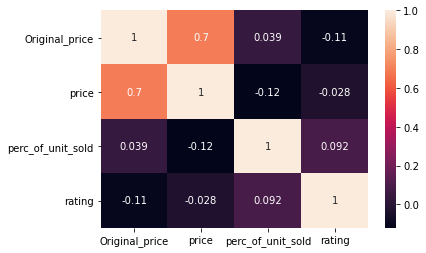

In [22]:
sns.heatmap(df.corr(), annot=True)

<AxesSubplot:xlabel='gender', ylabel='price'>

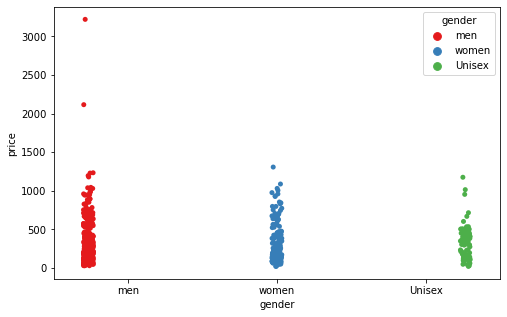

In [23]:
plt.figure(figsize=(8,5))
sns.stripplot(x = 'gender', y = 'price', data = df, hue='gender', palette='Set1', dodge=True)
#memperlihatkan bahwa produk dengan gender unisex cenderung murah 
#sedangkan pria memiliki banyak peminat hingga harga sampai angka 500+
#sedangkan wanita mulai menurun pada angka 400+

In [24]:
df['brand'].value_counts() #mengetahui jumlah stock by brand

Ray-Ban     61
Nike        46
Lacoste     41
Casio       39
JBW         28
            ..
Seiko        1
Flamingo     1
asics        1
Marc         1
Brit         1
Name: brand, Length: 113, dtype: int64

In [25]:
pd.crosstab(index=df['brand'], columns=df['gender'], values=df['perc_of_unit_sold'], aggfunc='mean')
#mencari tahu peminat tertinggi pada sebuah brand berdasarkan gender

gender,Unisex,men,women
brand,,,
Adidas,NaN,69.166667,65.285714
Akribos,NaN,79.000000,54.000000
Alexander,NaN,58.000000,NaN
Arnette,NaN,54.000000,36.000000
Asics,66.0,52.083333,52.500000
...,...,...,...
Watch,NaN,80.000000,30.000000
adidas,NaN,68.142857,37.500000
asics,NaN,NaN,33.000000


In [26]:
pd.crosstab(index=df['brand'], columns=df['gender'], values=df['rating'], aggfunc='mean').tail().sort_values(by='men',inplace=False, ascending=True)

gender,Unisex,men,women
brand,,,
hugo,NaN,88.000000,NaN
Watch,NaN,90.000000,66.0
adidas,NaN,93.142857,89.5
guess,NaN,93.333333,NaN
asics,NaN,NaN,88.0


In [27]:
pd.crosstab(index=df['brand'], columns=df['gender'], values=df['rating'], aggfunc='mean').tail().sort_values(by='women',inplace=False, ascending=True)

gender,Unisex,men,women
brand,,,
Watch,NaN,90.000000,66.0
asics,NaN,NaN,88.0
adidas,NaN,93.142857,89.5
guess,NaN,93.333333,NaN
hugo,NaN,88.000000,NaN


In [28]:
#Wanita lebih banyak memberikan rating rendah

In [51]:
pd.crosstab(index=df['category'], columns=df['gender'], values=df['perc_of_unit_sold'], aggfunc='median').tail().sort_values(by='men',inplace=False, ascending=False)


gender,Unisex,men,women
category,,,
Perfumes & Fragrances,80.0,78.0,75.5
Sportswear,NaN,58.0,45.0
Watches,72.0,58.0,58.0
Eyewear,54.5,56.0,58.0
Wallets,27.5,43.0,50.0


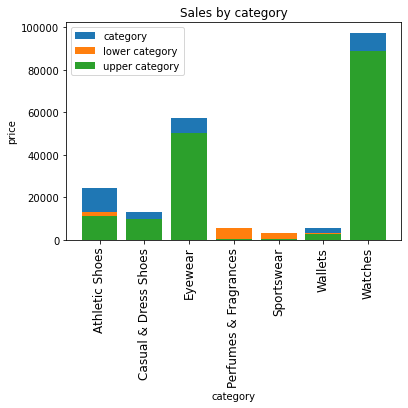

In [30]:
keys = [pair for pair, df in df.groupby(['category'])]

plt.bar(keys,df.groupby(['category']).sum()['price'])
plt.bar(keys,lower.groupby(['category']).sum()['price'])
plt.bar(keys,Upper.groupby(['category']).sum()['price'])
plt.xticks(keys, rotation=90, size=12)
plt.title('Sales by category')
plt.legend(['category','lower category','upper category'])
plt.ylabel('price')
plt.xlabel('category')
plt.show()
#mengetahui lower dan upper price pada category

In [32]:
df['category'].value_counts()

Watches                  180
Eyewear                  154
Athletic Shoes            95
Perfumes & Fragrances     63
Casual & Dress Shoes      47
Wallets                   37
Sportswear                33
Name: category, dtype: int64

In [43]:
Watches=df[df['category']=='Watches']
Eyewear=df[df['category']=='Eyewear']   
Athletic=df[df['category']=='Athletic Shoes']
Perfumes=df[df['category']=='Perfumes & Fragrances']
Casual=df[df['category']=='Casual & Dress Shoes']
Wallets=df[df['category']=='Wallets']
Sportswear=df[df['category']=='Sportswear']

In [36]:
Watches['brand'].value_counts().head(3)

Casio      39
JBW        28
Emporio    13
Name: brand, dtype: int64

In [37]:
Eyewear['brand'].value_counts().head(3)

Ray-Ban     61
Polaroid    28
Ray         13
Name: brand, dtype: int64

In [38]:
Athletic['brand'].value_counts().head(3)

Nike      42
Asics     21
Adidas     9
Name: brand, dtype: int64

In [39]:
Perfumes['brand'].value_counts().head(3)

Calvin      7
Davidoff    5
Guess       4
Name: brand, dtype: int64

In [40]:
Casual['brand'].value_counts().head(3)

Lacoste    32
Puma        5
Jack        3
Name: brand, dtype: int64

In [41]:
Wallets['brand'].value_counts().head(3)

guess     6
Tommy     6
Levi's    3
Name: brand, dtype: int64

In [44]:
Sportswear['brand'].value_counts().head(3)

Adidas    10
adidas     8
Under      8
Name: brand, dtype: int64

Meningkatkan sales dengan strategi marketing yang tepat sasaran, mendapatkan info produk yang diminati,
mengambil range harga yang memiliki penjualan tertinggi. Mengetahui faktor naik turunnya rating,


## Insight ##

stock yang harus difokuskan adalah parfume, sports wear, dan watches. Calvin, Davidoff, Guess adalah brand utama.
sportwear dengan brand Adidas dan Under.
dan watches dengan brand Casio, JBW,  dan emporio.
Harga untuk produk parfume dengan low price, watches high price, dan sports wear dengan low price.
parfume dengan target utama Unisex
sports wear sendiri dengan target yang jelas antar wanita/pria dengan perbandingan yang sama.
peningkatan pelayanan dan pemilihan produk harus diperhatikan lebih kepada wanita agar meningkatkan rating.